# Node2Vec Experimentation 

In [8]:
cd /thesis

[Errno 2] No such file or directory: '/thesis'
/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [9]:
import matplotlib.pyplot as plt

import networkx as nx
from node2vec_mod.node2vec import Node2Vec
# from node2vec import Node2Vec

## Networkx

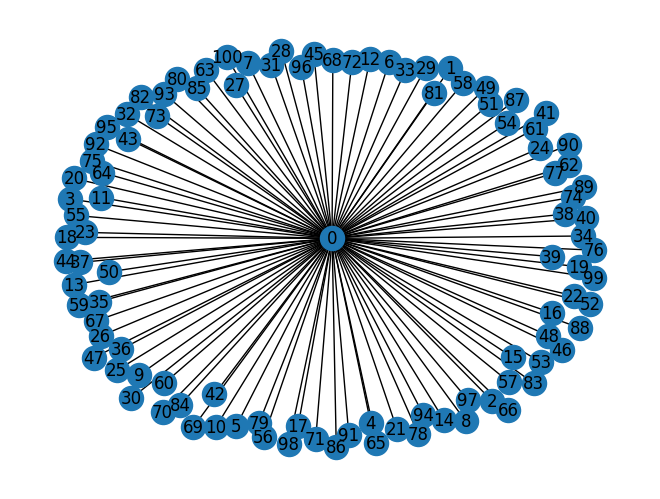

In [10]:
G = nx.complete_graph(10)
G = nx.star_graph(100)

pos = nx.spring_layout(G, k=2)

nx.draw(G, pos=pos, with_labels=True)

In [11]:
# Create a graph
G = nx.fast_gnp_random_graph(n=30, p=0.6)

# Positioning layout for drawing the graph
pos = nx.spring_layout(G)

In [12]:
# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(G, dimensions=64, walk_length=10, num_walks=200, workers=4)  # Use temp_folder for big graphs

Computing transition probabilities:   0%|          | 0/30 [00:00<?, ?it/s]

Test walks function output
[['26', '11', '22', '16', '24', '9', '20', '19', '20', '19'], ['16', '4', '6', '2', '0', '11', '22', '28', '7', '26'], ['28', '20', '6', '2', '22', '2', '21', '12', '22', '9'], ['21', '29', '7', '24', '13', '15', '6', '23', '18', '20'], ['0', '14', '25', '22', '26', '24', '16', '0', '24', '7'], ['24', '29', '11', '4', '5', '22', '11', '28', '4', '17'], ['22', '9', '13', '10', '3', '15', '24', '0', '16', '0'], ['8', '13', '5', '25', '17', '22', '27', '20', '9', '21'], ['11', '23', '6', '13', '10', '23', '11', '6', '5', '15'], ['17', '25', '28', '15', '22', '12', '20', '9', '20', '14'], ['9', '26', '20', '3', '21', '4', '11', '0', '16', '24'], ['23', '7', '5', '14', '10', '11', '5', '11', '12', '4'], ['27', '19', '23', '6', '5', '13', '16', '24', '0', '1'], ['2', '16', '22', '18', '13', '5', '9', '17', '16', '2'], ['19', '23', '8', '2', '21', '19', '9', '24', '26', '21'], ['7', '5', '12', '13', '12', '17', '3', '8', '23', '8'], ['29', '1', '16', '18', '20', '17

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 677.80it/s]


In [28]:
# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4) #, ns_exponent=1)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

In [29]:
# Look for most similar nodes
model.wv.most_similar('4')  # Output node names are always strings

[('38', 0.9842084646224976),
 ('65', 0.9831699728965759),
 ('49', 0.9819797277450562),
 ('93', 0.98191237449646),
 ('6', 0.9814806580543518),
 ('32', 0.9814141392707825),
 ('63', 0.98131263256073),
 ('81', 0.9808248281478882),
 ('20', 0.980633556842804),
 ('15', 0.9803733825683594)]

In [38]:
for node in list(map(str, G.nodes)):
    print(node, model.wv.most_similar(node)[0][1])  # Output node names are always strings

0 0.8575224280357361
1 0.9796804189682007
2 0.984960675239563
3 0.9780119061470032
4 0.9842084646224976
5 0.9822458624839783
6 0.9868557453155518
7 0.9849751591682434
8 0.9887457489967346
9 0.9858974814414978
10 0.984666645526886
11 0.9842706918716431
12 0.9846413135528564
13 0.9868558049201965
14 0.9828517436981201
15 0.985011637210846
16 0.9815158247947693
17 0.9848555326461792
18 0.9859297275543213
19 0.9797708988189697
20 0.9858975410461426
21 0.977166473865509
22 0.9852238893508911
23 0.9746537208557129
24 0.9845860600471497
25 0.9810135960578918
26 0.9841063618659973
27 0.9797022342681885
28 0.9874953627586365
29 0.9832848906517029
30 0.9784994125366211
31 0.9797709584236145
32 0.9814141988754272
33 0.9718379378318787
34 0.9795699119567871
35 0.986936628818512
36 0.9829033017158508
37 0.9845860004425049
38 0.9887457489967346
39 0.9858211874961853
40 0.9853636622428894
41 0.9843478202819824
42 0.9830517768859863
43 0.9796624183654785
44 0.9812299609184265
45 0.9874953031539917
46 

In [32]:
model.wv.most_similar('0')  # Output node names are always strings

[('5', 0.8575224280357361),
 ('4', 0.8367930054664612),
 ('7', 0.8341424465179443),
 ('93', 0.832687258720398),
 ('59', 0.8313259482383728),
 ('86', 0.8304312229156494),
 ('76', 0.829134464263916),
 ('65', 0.827785074710846),
 ('70', 0.8273723125457764),
 ('30', 0.8213443160057068)]

In [7]:
karate_graph = nx.karate_club_graph()

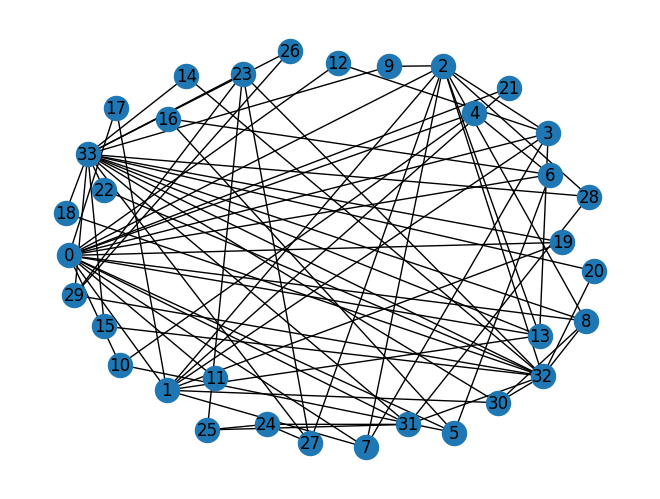

In [8]:
# Positioning layout for drawing the graph
pos = nx.spring_layout(karate_graph, k=8)

nx.draw(karate_graph, pos=pos, with_labels=True)

## Node2vec

In [9]:
node2vec = Node2Vec(karate_graph, dimensions=128, walk_length=30, num_walks=400, workers=4)  # Use temp_folder for big graphs

model = node2vec.fit(window=30, min_count=1, batch_words=4) #, ns_exponent=0.5)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 100/100 [00:00<00:00, 277.94it/s]


In [10]:
model.wv.most_similar('1')  # Output node names are always strings

[('13', 0.7511715888977051),
 ('7', 0.7489941716194153),
 ('3', 0.7095097303390503),
 ('2', 0.686106264591217),
 ('19', 0.685957670211792),
 ('21', 0.6736401915550232),
 ('0', 0.6575636267662048),
 ('17', 0.6481738090515137),
 ('11', 0.6344426870346069),
 ('12', 0.5811750292778015)]

In [11]:
dict(karate_graph.degree())

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

In [12]:
for node, deg in karate_graph.degree():
  print(f"Node {node} has degree {deg}")

Node 0 has degree 16
Node 1 has degree 9
Node 2 has degree 10
Node 3 has degree 6
Node 4 has degree 3
Node 5 has degree 4
Node 6 has degree 4
Node 7 has degree 4
Node 8 has degree 5
Node 9 has degree 2
Node 10 has degree 3
Node 11 has degree 1
Node 12 has degree 2
Node 13 has degree 5
Node 14 has degree 2
Node 15 has degree 2
Node 16 has degree 2
Node 17 has degree 2
Node 18 has degree 2
Node 19 has degree 3
Node 20 has degree 2
Node 21 has degree 2
Node 22 has degree 2
Node 23 has degree 5
Node 24 has degree 3
Node 25 has degree 3
Node 26 has degree 2
Node 27 has degree 4
Node 28 has degree 3
Node 29 has degree 4
Node 30 has degree 4
Node 31 has degree 6
Node 32 has degree 12
Node 33 has degree 17
